In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend
from phase_space_reconstruction.virtual.scans import run_3d_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.visualization import plot_3d_scan_data
from phase_space_reconstruction.train import train_3d_scan

from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

In [2]:
# lattice and data directory
p0c = 43.4e6 # reference momentum in eV/c
lattice = quadlet_tdc_bend(p0c=p0c, dipole_on=False)
data_dir = os.path.join('data', 'yaml_files')

In [3]:
# create gaussian and nongaussian beams using Bmad-X distgen functionality
gaussian_beam = torch.load('gt_beam.pt')

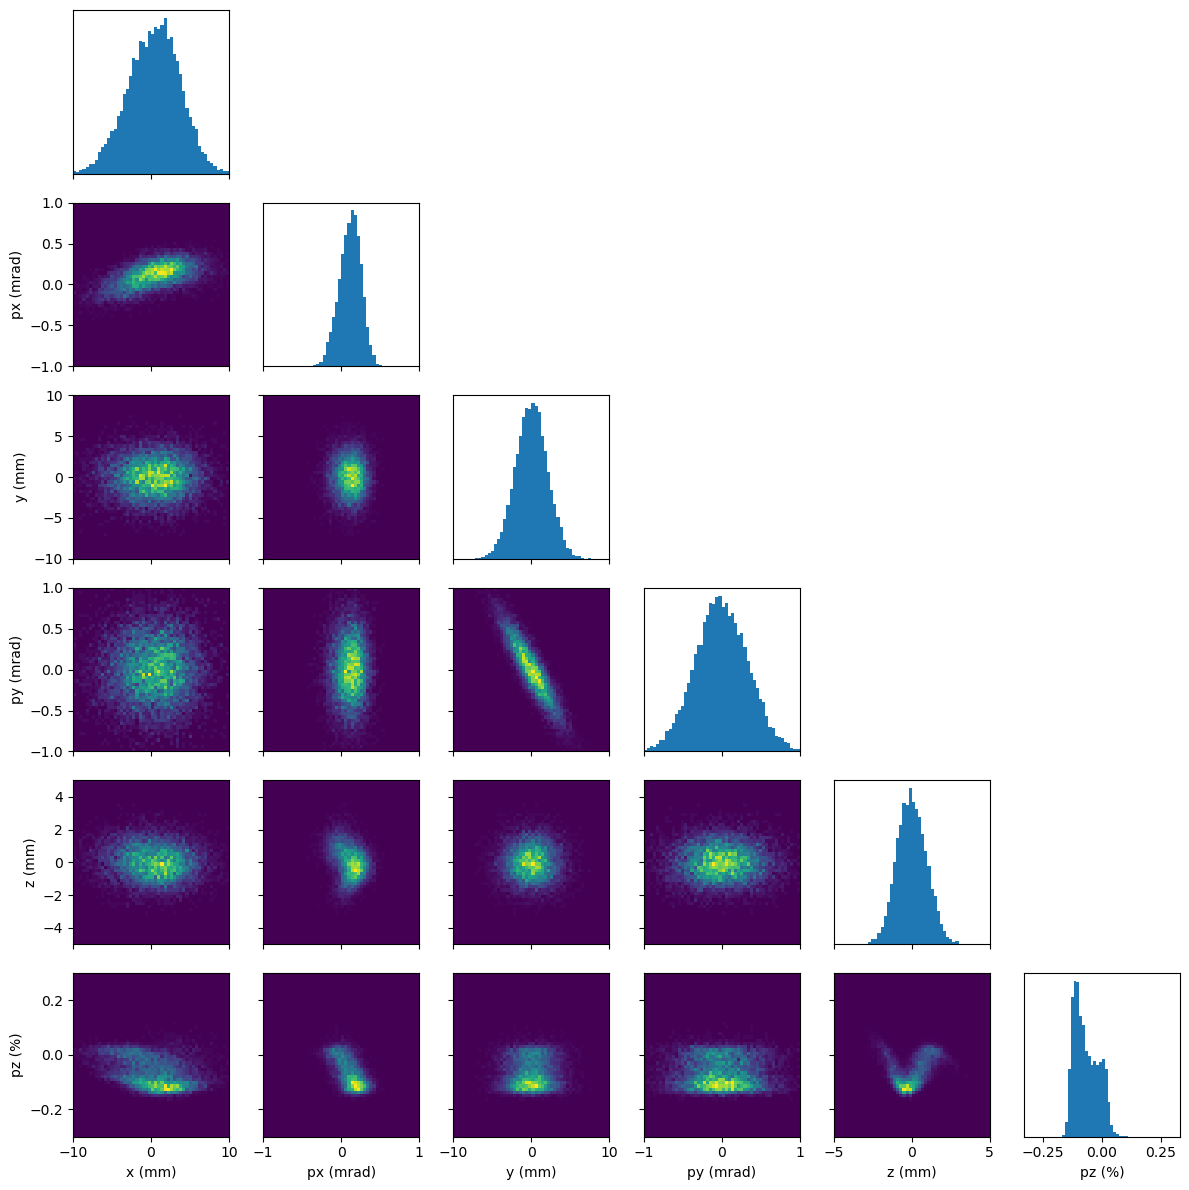

In [4]:
# plot linear and nonlinear beams
lims = np.array([[-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-10e-3, 10e-3],
                 [-1e-3, 1e-3],
                 [-5e-3, 5e-3],
                 [-3e-3, 3e-3]])
fig, ax = plot_projections(gaussian_beam.numpy_particles(), custom_lims=lims)
plt.show()

In [5]:
# use xopt for optimization
from triplet_opt import optimize_function, output
from xopt import VOCS

opt_vocs = VOCS(
        variables = {"k1":[0,20], "k2":[-20,0], "k3":[0,20]},
        objectives = {"total_size": "MINIMIZE"}
    )

opt_gaussian_beam = optimize_function(
    opt_vocs, output, n_iterations=100, 
    function_kwargs={
        'beam': gaussian_beam,
        'lattice': lattice
    }
)


/home/jp/mambaforge/envs/ps-reconstruction/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# optimization results for linear beam
opt_gaussian_beam.data

,k1,k2,k3,std_x,std_y,total_size,xopt_runtime,xopt_error
1,5.669209,-16.098931,13.962242,0.003100,0.000366,0.003012,0.036560,False
2,9.362956,-17.933410,12.530885,0.007897,0.001964,0.008017,0.034278,False
3,10.401000,-14.285523,11.486628,0.009073,0.003033,0.009440,0.036601,False
4,1.750015,-16.731162,15.876653,0.000328,0.001594,0.001511,0.037426,False
5,0.000000,-12.322033,12.154494,0.002216,0.001191,0.002380,0.036872,False
...,...,...,...,...,...,...,...,...
99,13.953671,-9.786774,7.484725,0.015151,0.007984,0.016991,0.037076,False
100,17.701746,-8.285358,17.856618,0.002169,0.032467,0.032433,0.037002,False
101,15.328113,-19.650216,9.493997,0.022483,0.007616,0.023611,0.037082,False
102,4.197385,-17.044604,14.739671,0.001568,0.001156,0.001808,0.036910,False


In [7]:
opt_gaussian_beam.data.iloc[-1][["k1","k2", "k3"]]

k1     0.778835
k2   -12.727689
k3    14.003951
Name: 103, dtype: object